In [1]:
from importlib.metadata import version
from pixellib.semantic import semantic_segmentation
import cv2
import urllib
import matplotlib.pyplot as plt
import numpy as np

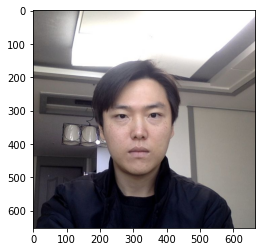

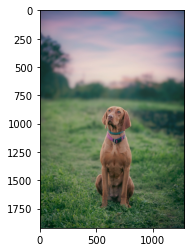

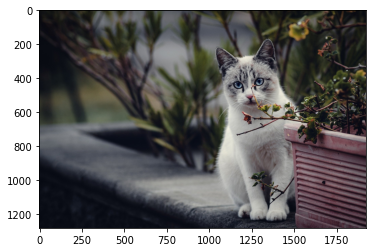

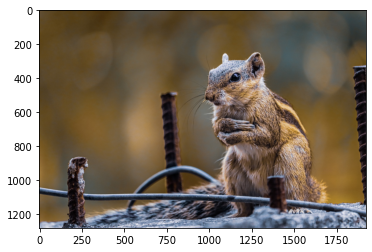

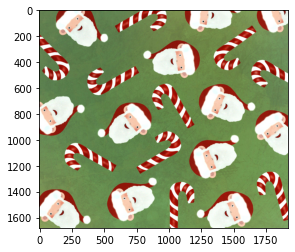

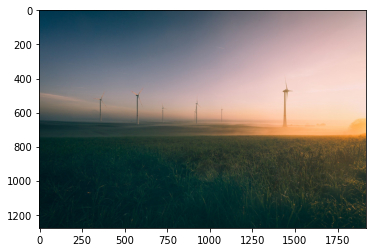

In [30]:
image_path = "/aiffel/aiffel/human_segmentation/images/"
image_person = cv2.imread(image_path + "1.png")
image_dog = cv2.imread(image_path + "dog.png")
image_cat = cv2.imread(image_path + "cat.png")
image_chipmunk = cv2.imread(image_path + "chipmunk.png")
image_background1 = cv2.imread(image_path + "background1.png")
image_background2 = cv2.imread(image_path + "background2.png")

plt.imshow(cv2.cvtColor(image_person, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(image_dog, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(image_cat, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(image_chipmunk, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(image_background1, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(image_background2, cv2.COLOR_BGR2RGB))
plt.show()

In [31]:
model_file = "/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5"
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [32]:
segvalue_person, output_person = model.segmentAsPascalvoc(image_path + "1.png")
segvalue_dog, output_dog = model.segmentAsPascalvoc(image_path + "dog.png")
segvalue_cat, output_cat = model.segmentAsPascalvoc(image_path + "cat.png")
segvalue_chipmunk, output_chipmunk = model.segmentAsPascalvoc(image_path + "chipmunk.png")
segvalue_background1, output_background1 = model.segmentAsPascalvoc(image_path + "background1.png")
segvalue_background2, output_background2 = model.segmentAsPascalvoc(image_path + "background2.png")

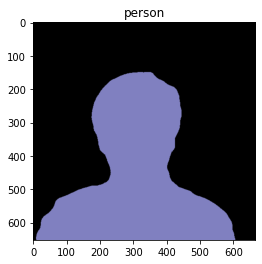

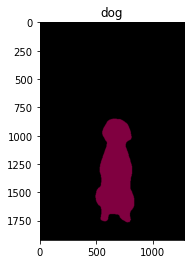

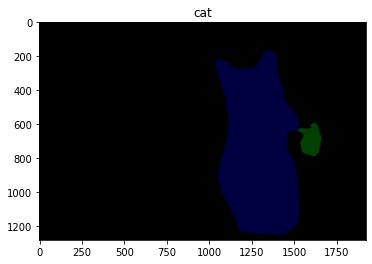

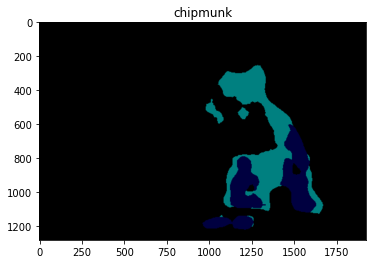

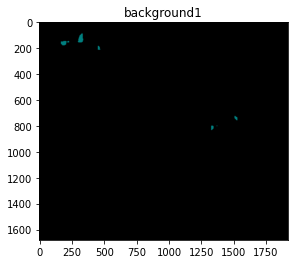

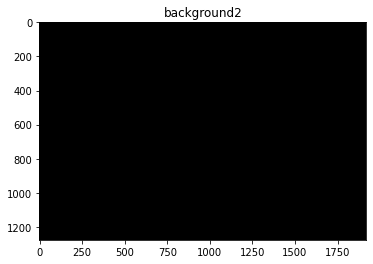

In [33]:
plt.imshow(output_person)
plt.title("person")
plt.show()

plt.imshow(output_dog)
plt.title("dog")
plt.show()

plt.imshow(output_cat)
plt.title("cat")
plt.show()

plt.imshow(output_chipmunk)
plt.title("chipmunk")
plt.show()

plt.imshow(output_background1)
plt.title("background1")
plt.show()

plt.imshow(output_background2)
plt.title("background2")
plt.show()

In [34]:
pascalvoc_label = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]

for i in range(len(segvalue_person["class_ids"])):
    print("person_image_label : {}".format(pascalvoc_label[segvalue_person["class_ids"][i]]))
print()

for i in range(len(segvalue_dog["class_ids"])):
    print("dog_image_label : {}".format(pascalvoc_label[segvalue_dog["class_ids"][i]]))
print()

for i in range(len(segvalue_cat["class_ids"])):
    print("cat_image_label : {}".format(pascalvoc_label[segvalue_cat["class_ids"][i]]))
print()

for i in range(len(segvalue_chipmunk["class_ids"])):
    print("chipmunk_image_label : {}".format(pascalvoc_label[segvalue_chipmunk["class_ids"][i]]))
print()

for i in range(len(segvalue_background1["class_ids"])):
    print("background1_image_label : {}".format(pascalvoc_label[segvalue_background1["class_ids"][i]]))
print()

for i in range(len(segvalue_background2["class_ids"])):
    print("background2_image_label : {}".format(pascalvoc_label[segvalue_background2["class_ids"][i]]))
print()

person_image_label : background
person_image_label : person

dog_image_label : background
dog_image_label : dog

cat_image_label : background
cat_image_label : cat
cat_image_label : pottedplant

chipmunk_image_label : background
chipmunk_image_label : bird
chipmunk_image_label : cat

background1_image_label : background
background1_image_label : bird

background2_image_label : background



In [35]:
#pixcellib colormap to BGR
#background  (0, 0, 0)
#person      (128, 128, 192)
#dog         (128, 0, 64)
#cat         (0, 0, 64)
#pottedplant (0, 64, 0)
#bird        (0, 128, 128)
image_mask_person = []
image_mask_dog = []
image_mask_cat = []
image_mask_chipmunk = []
image_mask_background1 = []
image_mask_background2 = []

color_mask_person = []
color_mask_dog = []
color_mask_cat = []
color_mask_chipmunk = []
color_mask_background1 = []
color_mask_background2 = []

bg_mask_person = []
bg_mask_dog = []
bg_mask_cat = []
bg_mask_chipmunk = []
bg_mask_background1 = []
bg_mask_background2 = []

colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3
    
seg_color = (128, 128, 192)
seg_map = np.all(output_person==seg_color, axis=-1)
image_mask_person.append(seg_map.astype(np.uint8)*255)
color_mask_person.append(cv2.cvtColor(seg_map.astype(np.uint8)*255, cv2.COLOR_GRAY2BGR))
bg_mask_person.append(cv2.bitwise_not(color_mask_person[0]))

seg_color = (128, 0, 64)
seg_map = np.all(output_dog==seg_color, axis=-1)
image_mask_dog.append(seg_map.astype(np.uint8)*255)
color_mask_dog.append(cv2.cvtColor(seg_map.astype(np.uint8)*255, cv2.COLOR_GRAY2BGR))
bg_mask_dog.append(cv2.bitwise_not(color_mask_dog[0]))

seg_color = (0, 0, 64)
seg_map = np.all(output_cat==seg_color, axis=-1)
image_mask_cat.append(seg_map.astype(np.uint8)*255)
color_mask_cat.append(cv2.cvtColor(seg_map.astype(np.uint8)*255, cv2.COLOR_GRAY2BGR))
seg_color = (0, 64, 0)
seg_map = np.all(output_cat==seg_color, axis=-1)
image_mask_cat.append(seg_map.astype(np.uint8)*255)
color_mask_cat.append(cv2.cvtColor(seg_map.astype(np.uint8)*255, cv2.COLOR_GRAY2BGR))
bg_mask_cat.append(cv2.bitwise_and(cv2.bitwise_not(color_mask_cat[0]), cv2.bitwise_not(color_mask_cat[1])))

seg_color = (0, 0, 64)
seg_map = np.all(output_chipmunk==seg_color, axis=-1)
image_mask_chipmunk.append(seg_map.astype(np.uint8)*255)
color_mask_chipmunk.append(cv2.cvtColor(seg_map.astype(np.uint8)*255, cv2.COLOR_GRAY2BGR))
seg_color = (0, 128, 128)
seg_map = np.all(output_chipmunk==seg_color, axis=-1)
image_mask_chipmunk.append(seg_map.astype(np.uint8)*255)
color_mask_chipmunk.append(cv2.cvtColor(seg_map.astype(np.uint8)*255, cv2.COLOR_GRAY2BGR))
bg_mask_chipmunk.append(cv2.bitwise_and(cv2.bitwise_not(color_mask_chipmunk[0]), cv2.bitwise_not(color_mask_chipmunk[1])))

seg_color = (0, 128, 128)
seg_map = np.all(output_background1==seg_color, axis=-1)
image_mask_background1.append(seg_map.astype(np.uint8)*255)
color_mask_background1.append(cv2.cvtColor(seg_map.astype(np.uint8)*255, cv2.COLOR_GRAY2BGR))
bg_mask_background1.append(cv2.bitwise_not(color_mask_background1[0]))

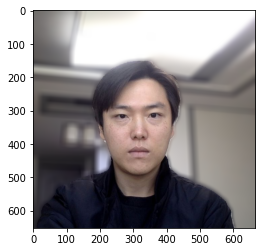

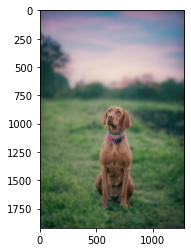

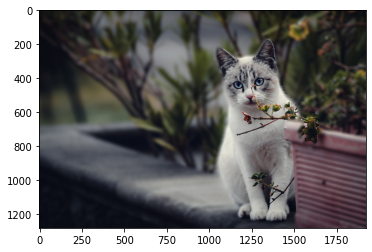

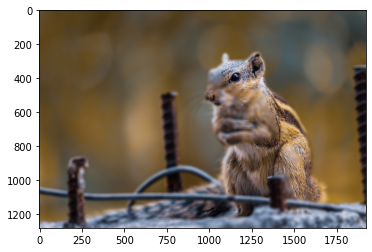

In [36]:
image_person_blur = cv2.blur(image_person, (20, 20))
image_dog_blur = cv2.blur(image_dog, (20, 20))
image_cat_blur = cv2.blur(image_cat, (20, 20))
image_chipmunk_blur = cv2.blur(image_chipmunk, (20, 20))

bg_blur_person = cv2.bitwise_and(image_person_blur, bg_mask_person[0])
bg_blur_dog = cv2.bitwise_and(image_dog_blur, bg_mask_dog[0])
bg_blur_cat = cv2.bitwise_and(image_cat_blur, bg_mask_cat[0])
bg_blur_chipmunk = cv2.bitwise_and(image_chipmunk_blur, bg_mask_chipmunk[0])

bg_blur_person = np.where(color_mask_person[0]==255, image_person, bg_blur_person)
plt.imshow(cv2.cvtColor(bg_blur_person, cv2.COLOR_BGR2RGB))
plt.show()

bg_blur_dog = np.where(color_mask_dog[0]==255, image_dog, bg_blur_dog)
plt.imshow(cv2.cvtColor(bg_blur_dog, cv2.COLOR_BGR2RGB))
plt.show()

bg_blur_cat = np.where(color_mask_cat[0]==255, image_cat, bg_blur_cat)
bg_blur_cat = np.where(color_mask_cat[1]==255, image_cat, bg_blur_cat)
plt.imshow(cv2.cvtColor(bg_blur_cat, cv2.COLOR_BGR2RGB))
plt.show()

bg_blur_chipmunk = np.where(color_mask_chipmunk[0]==255, image_chipmunk, bg_blur_chipmunk)
bg_blur_chipmunk = np.where(color_mask_chipmunk[1]==255, image_chipmunk, bg_blur_chipmunk)
plt.imshow(cv2.cvtColor(bg_blur_chipmunk, cv2.COLOR_BGR2RGB))
plt.show()

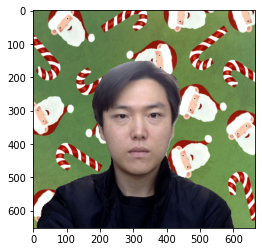

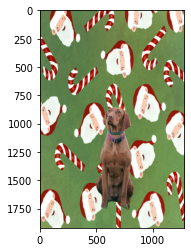

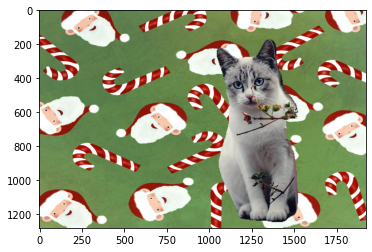

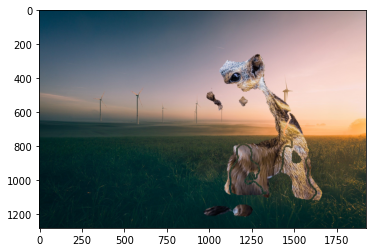

In [37]:
image_temp = cv2.resize(image_background1, (666, 652))
image_cromaky = np.where(color_mask_person[0]==255, image_person, image_temp)
plt.imshow(cv2.cvtColor(image_cromaky, cv2.COLOR_BGR2RGB))
plt.show()

image_temp = cv2.resize(image_background1, (1278, 1920))
image_cromaky = np.where(color_mask_dog[0]==255, image_dog, image_temp)
plt.imshow(cv2.cvtColor(image_cromaky, cv2.COLOR_BGR2RGB))
plt.show()

image_temp = cv2.resize(image_background1, (1920, 1280))
image_cromaky = np.where(color_mask_cat[0]==255, image_cat, image_temp)
plt.imshow(cv2.cvtColor(image_cromaky, cv2.COLOR_BGR2RGB))
plt.show()

image_temp = cv2.resize(image_background2, (1920, 1280))
image_cromaky = np.where(color_mask_chipmunk[0]==255, image_chipmunk, image_temp)
image_cromaky = np.where(color_mask_chipmunk[1]==255, image_chipmunk, image_cromaky)
plt.imshow(cv2.cvtColor(image_cromaky, cv2.COLOR_BGR2RGB))
plt.show()

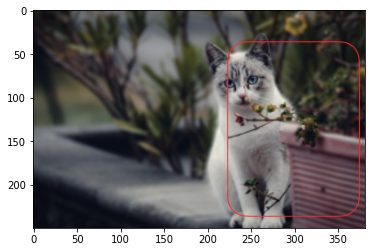

In [5]:
image_path = "/aiffel/aiffel/human_segmentation/images/"
image = cv2.imread(image_path + "screenshot.png")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()